In [94]:
import os
import sys
import fitz

def show_image(item, title=""):
    """Display a pixmap.

    Just to display Pixmap image of "item" - ignore the man behind the curtain.

    Args:
        item: any PyMuPDF object having a "get_pixmap" method.
        title: a string to be used as image title

    Generates an RGB Pixmap from item using a constant DPI and using matplotlib
    to show it inline of the notebook.
    """
    DPI = 150  # use this resolution
    import numpy as np
    import matplotlib.pyplot as plt

    # %matplotlib inline
    pix = item.get_pixmap(dpi=DPI)
    img = np.ndarray([pix.h, pix.w, 3], dtype=np.uint8, buffer=pix.samples_mv)
    plt.figure(dpi=DPI)  # set the figure's DPI
    plt.title(title)  # set title of image
    _ = plt.imshow(img, extent=(0, pix.w * 72 / DPI, pix.h * 72 / DPI, 0))

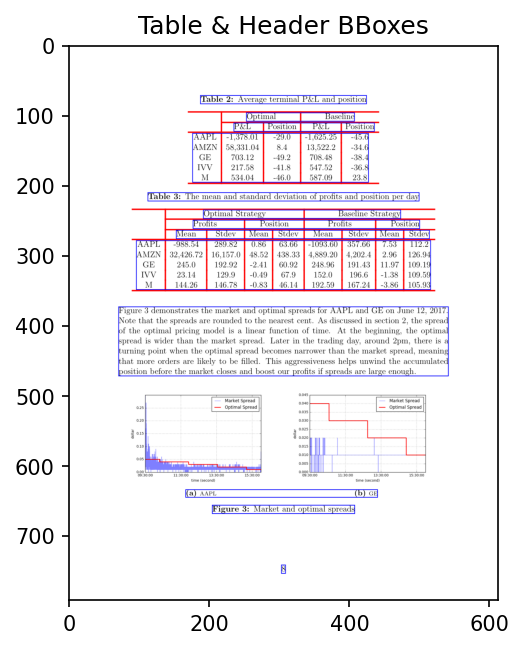

In [95]:
filename = "论文-图、表、公式.pdf"
doc = fitz.open(filename)
page_num = 7

page = doc[page_num]

blocks = page.get_text(
        "dict",
        flags=fitz.TEXTFLAGS_TEXT,
        #clip=clip,
    )["blocks"]

text_blocks = []
for bbox in blocks:
    text_blocks.append(bbox['bbox'])


path_bbox = []
paths = page.get_drawings()
for p in paths:
    path_bbox.append(p["rect"].irect)


shape = page.new_shape()
# iterate over the bboxes
for i, rect in enumerate(path_bbox):
    shape.draw_rect(rect)  # draw a border
    #shape.insert_text(Point(rect[0], rect[1])+(5, 15), str(i), color=fitz.pdfcolor["blue"])
    shape.finish(color=fitz.pdfcolor["red"])
    shape.commit()  # store to the page

for rect in text_blocks:
    shape.draw_rect(rect)  # draw a border
    shape.finish(color=fitz.pdfcolor["blue"])
    shape.commit()  # store to the page
    
show_image(page, f"Table & Header BBoxes")


## 页面上所有的线条情况

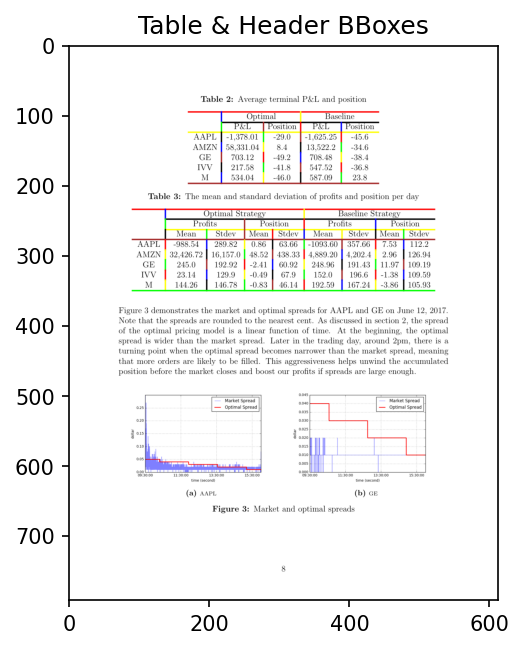

In [116]:
filename = "论文-图、表、公式.pdf"
doc = fitz.open(filename)
page_num = 7
page = doc[page_num]
shape = page.new_shape()
# iterate over the bboxes
color_map = [fitz.pdfcolor["red"], fitz.pdfcolor["blue"], fitz.pdfcolor["yellow"], fitz.pdfcolor["black"], fitz.pdfcolor["green"], fitz.pdfcolor["brown"]]
for i, rect in enumerate(path_bbox):
    shape.draw_rect(rect)  # draw a border
    #shape.insert_text(Point(rect[0], rect[1])+(5, 15), str(i), color=fitz.pdfcolor["blue"])
    shape.finish(color=color_map[i%len(color_map)])
    shape.commit()  # store to the page

show_image(page, f"Table & Header BBoxes")

## 把水平和垂直的线条分别取出来

In [97]:
path_bbox[0]

IRect(170, 95, 442, 96)

In [98]:
path_bbox[1]

IRect(217, 95, 218, 111)

In [99]:
path_bbox
formated_path_bbox = []
for rec in path_bbox:
    formated_path_bbox.append([rec[0], rec[1], rec[2], rec[3]])

In [100]:
len(formated_path_bbox)

89

### 把线条水平化，不能水平化的删除
 - 先在X0上sort一下， 然后把差距在1 的合并为最大的值
 - y0, x1, y1做类似处理

In [101]:
sort_x0 = sorted(formated_path_bbox, key=lambda x: x[0])
sort_x0

[[90, 234, 522, 235],
 [90, 277, 522, 278],
 [90, 350, 522, 351],
 [137, 234, 138, 249],
 [137, 248, 522, 249],
 [137, 248, 138, 264],
 [137, 263, 522, 264],
 [137, 263, 138, 278],
 [137, 278, 138, 293],
 [137, 292, 138, 307],
 [137, 306, 138, 322],
 [137, 321, 138, 336],
 [137, 335, 138, 351],
 [170, 95, 442, 96],
 [170, 124, 442, 125],
 [170, 197, 442, 198],
 [196, 263, 197, 278],
 [196, 278, 197, 293],
 [196, 292, 197, 307],
 [196, 306, 197, 322],
 [196, 321, 197, 336],
 [196, 335, 197, 351],
 [217, 95, 218, 111],
 [217, 110, 442, 111],
 [217, 110, 218, 125],
 [217, 124, 218, 140],
 [217, 139, 218, 154],
 [217, 153, 218, 169],
 [217, 168, 218, 183],
 [217, 182, 218, 198],
 [250, 248, 251, 264],
 [250, 263, 251, 278],
 [250, 278, 251, 293],
 [250, 292, 251, 307],
 [250, 306, 251, 322],
 [250, 321, 251, 336],
 [250, 335, 251, 351],
 [277, 110, 278, 125],
 [277, 124, 278, 140],
 [277, 139, 278, 154],
 [277, 153, 278, 169],
 [277, 168, 278, 183],
 [277, 182, 278, 198],
 [290, 263, 291, 

In [102]:

def format_lines(tuple_idx, sort_list):
    idx = tuple_idx
    sorted_list = sorted(sort_list, key=lambda x: x[idx])
    if len(sort_x0)<=1:
        print("线条数量不足")
    else:
        i,j = 0, 1 # 开头和结尾
        std_valmax = 0
        while j<len(sorted_list):
            ival, jval = sorted_list[i][idx], sorted_list[j][idx]
            if abs(ival-jval)<=1:
                std_valmax = max(std_valmax, ival, jval)
                sorted_list[i][idx], sorted_list[j][idx] = std_valmax, std_valmax
                j += 1
            else:
                std_valmax = 0
                i = j
                j += 1

    return sorted_list


In [103]:
l = formated_path_bbox
for i in [0, 1, 2,3]:
    l = format_lines(i, l)

l

[[170, 95, 442, 96],
 [217, 95, 218, 111],
 [330, 95, 331, 111],
 [217, 110, 442, 111],
 [217, 110, 218, 125],
 [277, 110, 278, 125],
 [330, 110, 331, 125],
 [389, 110, 390, 125],
 [170, 124, 442, 125],
 [217, 124, 218, 140],
 [277, 124, 278, 140],
 [330, 124, 331, 140],
 [388, 124, 389, 140],
 [217, 139, 218, 154],
 [277, 139, 278, 154],
 [330, 139, 331, 154],
 [388, 139, 389, 154],
 [217, 153, 218, 169],
 [277, 153, 278, 169],
 [330, 153, 331, 169],
 [388, 153, 389, 169],
 [217, 168, 218, 183],
 [277, 168, 278, 183],
 [330, 168, 331, 183],
 [388, 168, 389, 183],
 [217, 182, 218, 198],
 [277, 182, 278, 198],
 [330, 182, 331, 198],
 [388, 182, 389, 198],
 [170, 197, 442, 198],
 [90, 234, 522, 235],
 [137, 234, 138, 249],
 [335, 234, 336, 249],
 [137, 248, 522, 249],
 [137, 248, 138, 264],
 [250, 248, 251, 264],
 [335, 248, 336, 264],
 [437, 248, 438, 264],
 [137, 263, 522, 264],
 [137, 263, 138, 278],
 [196, 263, 197, 278],
 [250, 263, 251, 278],
 [290, 263, 291, 278],
 [335, 263, 336,

### 然后水平方向再对齐让线条水平或者垂直

In [104]:
from fitz.fitz import IRect

new_path_bbox = []
for rect in l:# 向大的靠拢
    x0, y0, x1, y1 = rect[0], rect[1], rect[2], rect[3]
    if abs(x0-x1)<=1:
        x0 = x1 = max(x0, x1)
    if abs(y0-y1)<=1:
        y0 = y1 = max(y0, y1)

    new_path_bbox.append([x0, y0, x1, y1])

new_path_bbox

[[170, 96, 442, 96],
 [218, 95, 218, 111],
 [331, 95, 331, 111],
 [217, 111, 442, 111],
 [218, 110, 218, 125],
 [278, 110, 278, 125],
 [331, 110, 331, 125],
 [390, 110, 390, 125],
 [170, 125, 442, 125],
 [218, 124, 218, 140],
 [278, 124, 278, 140],
 [331, 124, 331, 140],
 [389, 124, 389, 140],
 [218, 139, 218, 154],
 [278, 139, 278, 154],
 [331, 139, 331, 154],
 [389, 139, 389, 154],
 [218, 153, 218, 169],
 [278, 153, 278, 169],
 [331, 153, 331, 169],
 [389, 153, 389, 169],
 [218, 168, 218, 183],
 [278, 168, 278, 183],
 [331, 168, 331, 183],
 [389, 168, 389, 183],
 [218, 182, 218, 198],
 [278, 182, 278, 198],
 [331, 182, 331, 198],
 [389, 182, 389, 198],
 [170, 198, 442, 198],
 [90, 235, 522, 235],
 [138, 234, 138, 249],
 [336, 234, 336, 249],
 [137, 249, 522, 249],
 [138, 248, 138, 264],
 [251, 248, 251, 264],
 [336, 248, 336, 264],
 [438, 248, 438, 264],
 [137, 264, 522, 264],
 [138, 263, 138, 278],
 [197, 263, 197, 278],
 [251, 263, 251, 278],
 [291, 263, 291, 278],
 [336, 263, 336,

In [105]:
l = new_path_bbox
for i in [1]:
    l = format_lines(i, l)

l

[[218, 96, 218, 111],
 [331, 95, 331, 111],
 [170, 96, 442, 96],
 [218, 111, 218, 125],
 [278, 110, 278, 125],
 [331, 110, 331, 125],
 [390, 110, 390, 125],
 [217, 111, 442, 111],
 [218, 125, 218, 140],
 [278, 124, 278, 140],
 [331, 124, 331, 140],
 [389, 124, 389, 140],
 [170, 125, 442, 125],
 [218, 139, 218, 154],
 [278, 139, 278, 154],
 [331, 139, 331, 154],
 [389, 139, 389, 154],
 [218, 153, 218, 169],
 [278, 153, 278, 169],
 [331, 153, 331, 169],
 [389, 153, 389, 169],
 [218, 168, 218, 183],
 [278, 168, 278, 183],
 [331, 168, 331, 183],
 [389, 168, 389, 183],
 [218, 182, 218, 198],
 [278, 182, 278, 198],
 [331, 182, 331, 198],
 [389, 182, 389, 198],
 [170, 198, 442, 198],
 [138, 235, 138, 249],
 [336, 234, 336, 249],
 [90, 235, 522, 235],
 [138, 249, 138, 264],
 [251, 248, 251, 264],
 [336, 248, 336, 264],
 [438, 248, 438, 264],
 [137, 249, 522, 249],
 [138, 264, 138, 278],
 [197, 263, 197, 278],
 [251, 263, 251, 278],
 [291, 263, 291, 278],
 [336, 263, 336, 278],
 [390, 263, 390,

### 过滤掉不是水平或者垂直的线段
判断标准是：既没有x0=x1 也没有y0=y1

In [106]:
pre_processed_lines = []
for box in l:
    x0, y0, x1, y1 = box[0], box[1], box[2], box[3]
    if x0!=x1 and y0!=y1:
        continue
    else:
        pre_processed_lines.append(box)

len(pre_processed_lines)

89

## 把线段分成水平和垂直两部分，方便计算

In [107]:
table_vline = []
table_hline = []

for l in pre_processed_lines:
    x0, y0, x1, y1 = l[0], l[1], l[2], l[3]
    if x0==x1:
        table_vline.append(l)
    else:
        table_hline.append(l)    

In [114]:
table_vline = sorted(table_vline)
table_hline = sorted(table_hline, key=lambda x: (x[0], x[1]))

In [115]:
table_hline

[[90, 235, 522, 235],
 [90, 278, 522, 278],
 [90, 351, 522, 351],
 [137, 249, 522, 249],
 [137, 264, 522, 264],
 [170, 96, 442, 96],
 [170, 125, 442, 125],
 [170, 198, 442, 198],
 [217, 111, 442, 111]]

In [108]:
len(table_vline)

80

In [110]:
len(table_hline)

9

## 分离不同table的线段

In [ ]:
def sep_table_lines(lines):
    table_lines = []
    table = []
    for l in lines:
        pass


## 把这些线段拼成更长的线段

## 计算上述线段组成的小矩形（table cell）

In [93]:
def find_rectangles(lines):
    h_lines = sorted([(y0, x0, x1) for x0, y0, x1, y1 in lines if y0 == y1])
    v_lines = sorted([(x0, y0, y1) for x0, y0, x1, y1 in lines if x0 == x1])
    intersections = [(x, y) for x, _, _ in v_lines for _, x0, x1 in h_lines if x0 <= x <= x1]
    rectangles = [((ix, iy), (jx, jy)) for i, (ix, iy) in enumerate(intersections) 
                  for j, (jx, jy) in enumerate(intersections[i + 1:]) if ix < jx and iy < jy]
    return rectangles

x = find_rectangles(pre_processed_lines)
x

NameError: name 'y' is not defined

In [14]:
path_vbox = []
path_hbox = []

for rect in path_bbox:
    x0, x1 = rect[0], rect[2]
    y0, y1 = rect[1], rect[3]
    if abs(x0-x1)<=1:
        path_vbox.append(rect)
    if abs(y0-y1)<=1:
        path_hbox.append(rect)

print(len(path_vbox))
print(len(path_hbox))

80
9


## 根据是否有交点进行线条的聚类

## 获取table的rect最外围范围